# Diffusion in 1-dimension and application to FRAP

This exercise was generated from a Jupyter notebook. You can download the notebook [here](diffusion_1d_and_FRAP_in_class.ipynb).

In [21]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Import the utilities file
import pboc_utilities as pboc

The master equation for diffusion

\begin{align}
p(n,t + \Delta t) = p(n, t) + k \, \Delta t p(n-1, t) + k \, \Delta t p(n+1, t) - 2k \, \Delta t p(n,t).
\end{align}

The master equation for diffusion

\begin{align}
p(n,t + \Delta t) = p(n, t) + k \, \Delta t p(n-1, t) + k \, \Delta t p(n+1, t) - 2k \, \Delta t p(n,t).
\end{align}

In [38]:
# Number of boxes
n_boxes = 40

# Time increment (Delta t) in seconds
dt = 0.1

# Number of steps
n_steps = 100

# Hopping rate constant (k) in sec^-1
k = 1

In [40]:
# Initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# Initial position
x0 = n_boxes // 2

p[x0, 0] = 1

# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(n_steps - 1):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t+1] = p[n,t] + k*dt*p[n-1,t] + k*dt*p[n+1,t]  \
                          - 2*k*dt*p[n,t]

    # Boundary cases
    p[0,t+1] = p[0,t] + k*dt*p[1,t] - k*dt*p[0,t]
#     p[n_boxes-1, t+1] = p[n_boxes-1, t] + k*dt*p[n_boxes-2,t] - k*dt*p[n_boxes-1, t]

    # Cleaner alternative
    p[-1, t+1] = p[-1, t] + k*dt*p[-2,t] - k*dt*p[-1, t]
    
np.sum(p,0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

(<matplotlib.figure.Figure at 0x1227643c8>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1225fccf8>)

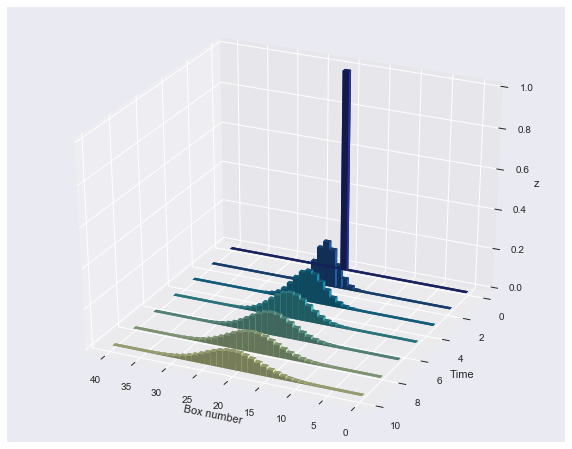

In [42]:
pboc.bar_plot(p, n_slices = 6, dy = dt, x_label='Box number', y_label='Time')

In [31]:
# Sequence of steps in FRAP initialization

mat_1d = np.ones(10)
print(mat_1d)

mat_1d[3:8] = 0
print(mat_1d)

mat_1d = mat_1d / np.sum(mat_1d)
print(mat_1d)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.]
[ 0.2  0.2  0.2  0.   0.   0.   0.   0.   0.2  0.2]


In [36]:
# 
n_steps = 1000

# Larger time step
dt = 0.2

# Initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# ---------- FRAP initialization ----------
# Assign non-zero values
p[:,0] = 1

# Photobleaching
start = n_boxes // 4
end = 3*n_boxes // 4
p[start:end,0] = 0

# Normalization
p[:,0] = p[:,0] / np.sum(p[:,0])

# ------------------------------------------

# Boundary conditions
# @ n = 0 
# @ n = n_boxes-1

for t in range(n_steps - 1):
    
    # Interior region
    for n in range(1,n_boxes-1):
        p[n,t+1] = p[n,t] + k*dt*p[n-1,t] + k*dt*p[n+1,t]  \
                          - 2*k*dt*p[n,t]

    # Boundary cases
    p[0,t+1] = p[0,t] + k*dt*p[1,t] - k*dt*p[0,t]
#     p[n_boxes-1, t+1] = p[n_boxes-1, t] + k*dt*p[n_boxes-2,t] - k*dt*p[n_boxes-1, t]

    # Cleaner alternative
    p[-1, t+1] = p[-1, t] + k*dt*p[-2,t] - k*dt*p[-1, t]

(<matplotlib.figure.Figure at 0x1219ef710>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1215c6048>)

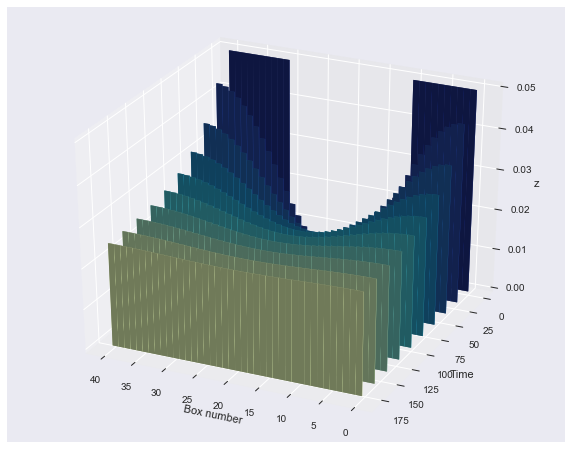

In [37]:
pboc.bar_plot(p, n_slices = 10, dy = dt, x_label='Box number', y_label='Time')